In [61]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

gas = pd.read_csv("./datasets/gas_prices.csv")
fifa = pd.read_csv("./datasets/fifa_data.csv")

print("Python version:", sys.version[:5])

Python version: 3.8.5


# Learning Matplotlib

## Basic graph

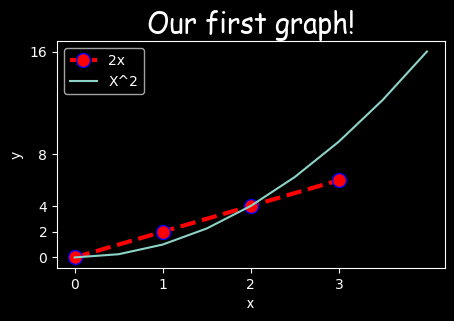

In [56]:
x = [0, 1, 2, 3]
y = [0, 2, 4, 6]

plt.figure(figsize=(5,3), dpi=100)

#plt.plot(x, y, "color[r, g, b]marker[^.o]line[--]", **kwargs)
plt.plot(x, y, label="2x", c="red", linewidth=3, marker="o", markersize=10, markeredgecolor="blue", linestyle="--")

# Second line

x2 = np.arange(0, 4.5, 0.5)

plt.plot(x2, x2 ** 2, label="X^2")


plt.title("Our first graph!", fontdict={"fontname": "Comic Sans MS", "fontsize": 20})

plt.xlabel("x",fontdict={"fontname": "Arial"})
plt.ylabel("y")

plt.xticks([0, 1, 2, 3])
plt.yticks([0, 2, 4, 8, 16])

plt.legend()

plt.savefig("./graphs/mygraph.png", dpi=300)

plt.show()

## Bar Chart

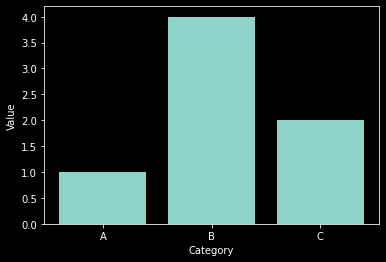

In [60]:
labels = ['A', 'B', 'C']
values = [1, 4, 2]

plt.bar(labels, values)

plt.xlabel("Category")
plt.ylabel("Value")

plt.show()

## Real world examples

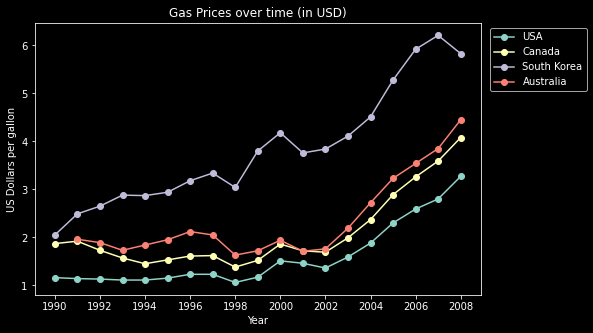

In [91]:
plt.figure(figsize=(8, 5))

plt.title("Gas Prices over time (in USD)")

plt.plot(gas["Year"], gas["USA"], label="USA", marker="o")
plt.plot(gas["Year"], gas["Canada"], label="Canada", marker="o")
plt.plot(gas["Year"], gas["South Korea"], label="South Korea", marker="o")
plt.plot(gas["Year"], gas["Australia"], label="Australia", marker="o")

plt.xticks(gas.Year[::2])

plt.xlabel("Year")
plt.ylabel("US Dollars per gallon")

plt.legend(bbox_to_anchor=(1.01, 1))

plt.show()

In [92]:
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Histogram

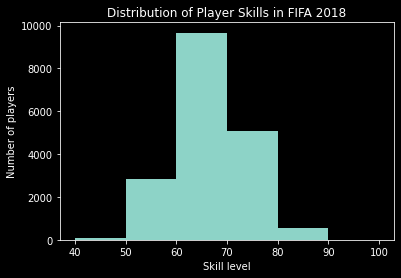

In [100]:
bins = np.arange(40, 110, 10)

plt.hist(fifa["Overall"], bins=bins)
plt.xticks(bins)

plt.xlabel("Skill level")
plt.ylabel("Number of players")
plt.title("Distribution of Player Skills in FIFA 2018")

plt.show()

## Pie chart

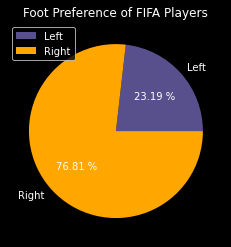

In [122]:
left = fifa[fifa["Preferred Foot"] == "Left"].count()[0]
right = fifa[fifa["Preferred Foot"] == "Right"].count()[0]

labels = ["Left", "Right"]
colors = ["#58508d", "#ffa600"]


plt.pie([left, right], labels=labels, colors=colors, autopct="%.2f %%")

plt.title("Foot Preference of FIFA Players")

plt.legend()

plt.show()

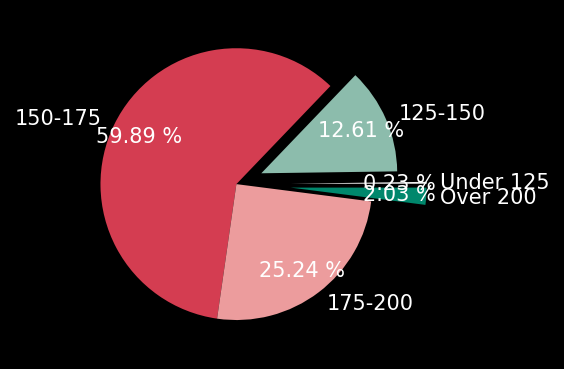

In [140]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ["Under 125", "125-150", "150-175", "175-200", "Over 200"]
colors = ["#f1f1f1", "#8cbcac", "#d43d51", "#ec9c9d", "#00876c"]
explode = (.4, .2, 0, 0, .4)

plt.figure(figsize=(5,3), dpi=150)

plt.pie(weights, labels=labels, colors=colors, autopct="%.2f %%", pctdistance=0.8, explode=explode)

plt.show()

## Box and Whisker plot

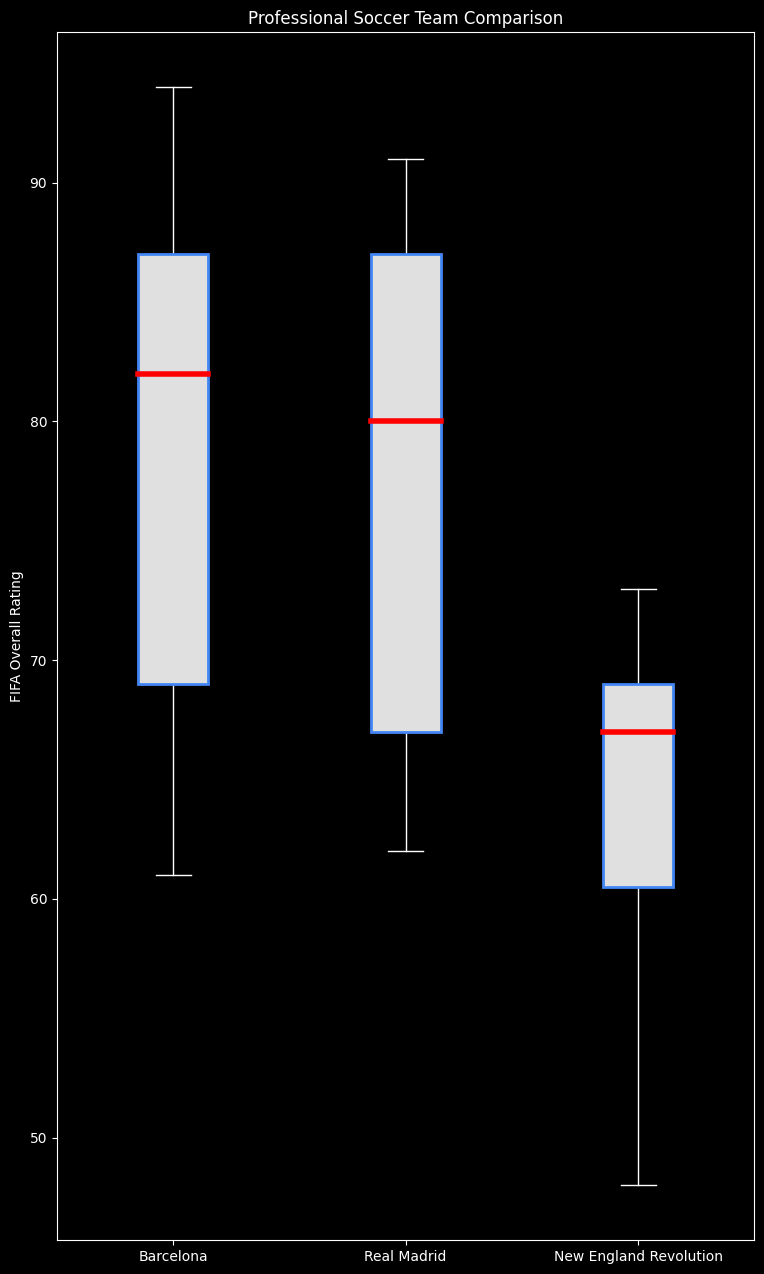

In [165]:
barcelona = fifa.loc[fifa.Club == "FC Barcelona"]["Overall"] 
madrid = fifa.loc[fifa.Club == "Real Madrid"]["Overall"] 
revs = fifa.loc[fifa.Club == "New England Revolution"]["Overall"]

plt.figure(figsize=(9, 16), dpi=100)

labels = ["Barcelona", "Real Madrid", "New England Revolution"]

boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True, medianprops={"linewidth": 4, "color": "red"} )

for box in boxes["boxes"]:
  box.set(color="#4286f4", linewidth=2, facecolor="#e0e0e0")


plt.title("Professional Soccer Team Comparison")
plt.ylabel("FIFA Overall Rating")

plt.show()